# Load the dataset


In [1]:
import pandas as pd

# Define the file path
file_path = 'C:/Users/Bhavya/OneDrive/Desktop/Company assessments/Policy bazaar BA/Policybazaar Assignment - Dataset (1) (2) (1) (1) (2) (1).xlsx'

# Load the dataset from the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


,id,city_name,city_tier,product_type,lead_creation_date,booking_date,premium,revenue,age,campaign
0,1,parbhani,tier-3,term,2021-01-05,2021-01-19,151870,16705.70,36,source_b
1,2,sundargarh,tier-3,investment,2021-04-25,2021-05-03,2488,174.16,61,source_c
2,3,valod,tier-3,term,2021-04-14,2021-05-07,496469,59576.28,34,organic
3,4,surendranagar,tier-3,term,2021-03-19,2021-04-02,483803,38704.24,36,organic
4,5,simdega,tier-3,car,2021-02-23,2021-02-24,11380,1365.60,32,source_c


# Cleaning the data


In [2]:
# Convert date columns to datetime
df['lead_creation_date'] = pd.to_datetime(df['lead_creation_date'], format='%d-%m-%y')
df['booking_date'] = pd.to_datetime(df['booking_date'], format='%d-%m-%y')

# Check for missing values
df.isnull().sum()


id                    0
city_name             0
city_tier             0
product_type          0
lead_creation_date    0
booking_date          0
premium               0
revenue               0
age                   0
campaign              0
dtype: int64

# Exploratory Data Analysis (EDA)

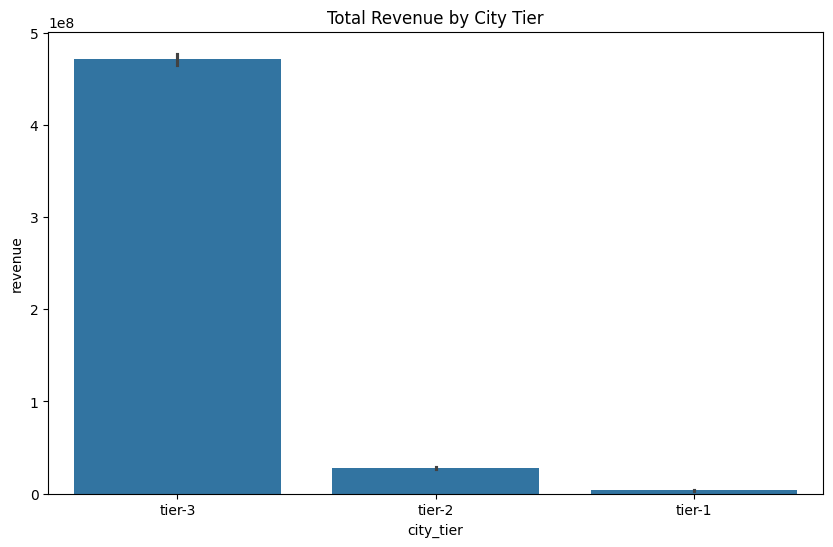

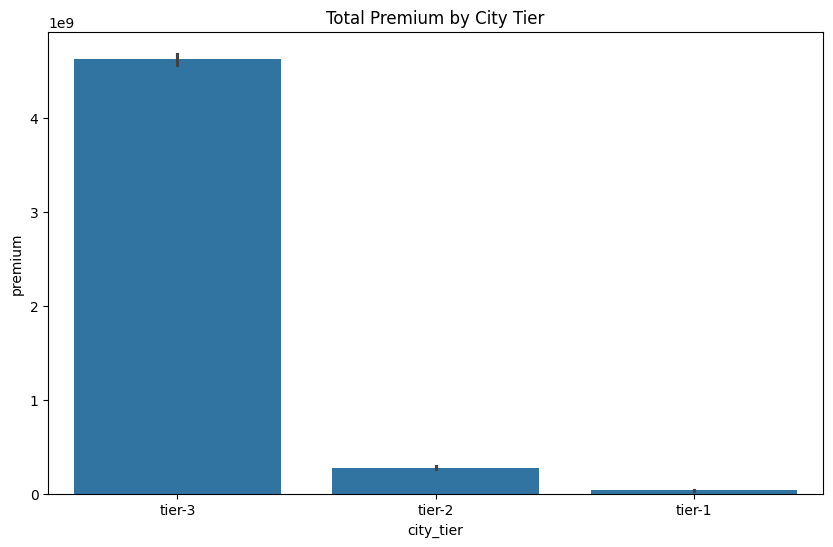

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics
df.describe()
# Bar plot for Average Revenue by City Tier
plt.figure(figsize=(10, 6))
sns.barplot(x='city_tier', y='revenue', data=df, estimator=sum)
plt.title('Total Revenue by City Tier')
plt.show()

# Bar plot for Average Premium by City Tier
plt.figure(figsize=(10, 6))
sns.barplot(x='city_tier', y='premium', data=df, estimator=sum)
plt.title('Total Premium by City Tier')
plt.show()


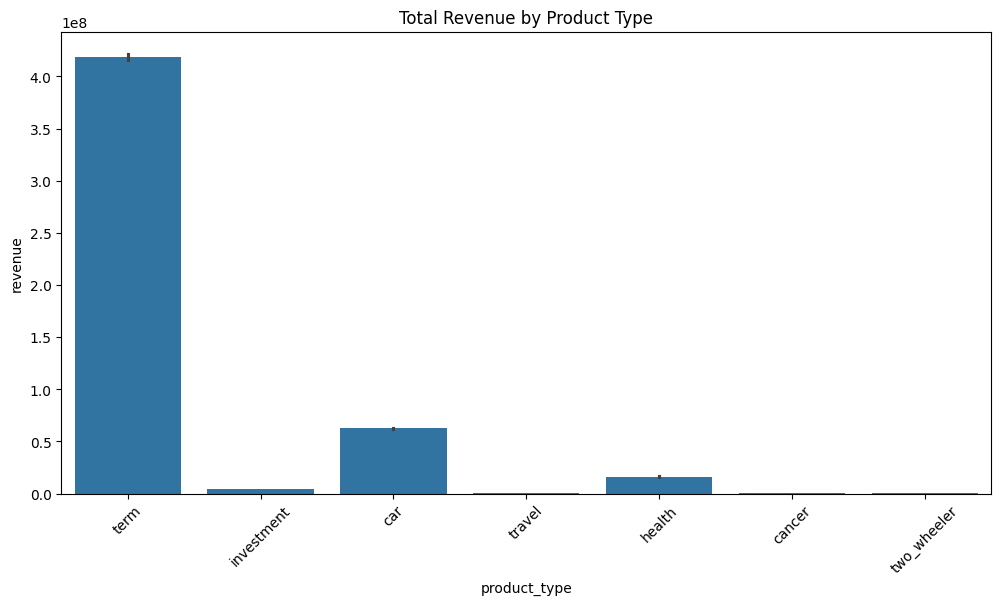

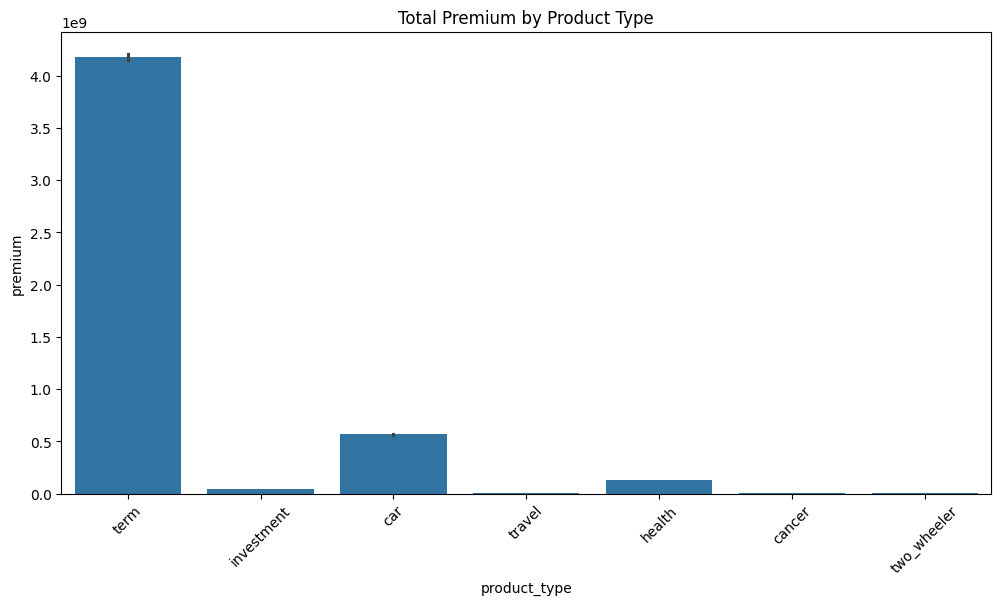

In [8]:
# Bar plot for Total Revenue by Product Type
plt.figure(figsize=(12, 6))
sns.barplot(x='product_type', y='revenue', data=df, estimator=sum)
plt.title('Total Revenue by Product Type')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Total Premium by Product Type
plt.figure(figsize=(12, 6))
sns.barplot(x='product_type', y='premium', data=df, estimator=sum)
plt.title('Total Premium by Product Type')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Conversion Rate by City Tier
df['converted'] = df['booking_date'].notnull().astype(int)
conversion_rates = df.groupby('city_tier')['converted'].mean().reset_index(name='conversion_rate')
conversion_rates['conversion_rate'] *= 100  # Convert to percentage
print("Conversion Rates by City Tier:\n", conversion_rates)


Conversion Rates by City Tier:
   city_tier  conversion_rate
0    tier-1            100.0
1    tier-2            100.0
2    tier-3            100.0


In [13]:
# Conversion Rate by Product Type
conversion_rates_product = df.groupby('product_type')['converted'].mean().reset_index(name='conversion_rate')
conversion_rates_product['conversion_rate'] *= 100  # Convert to percentage
print("Conversion Rates by Product Type:\n", conversion_rates_product)


Conversion Rates by Product Type:
   product_type  conversion_rate
0       cancer            100.0
1          car            100.0
2       health            100.0
3   investment            100.0
4         term            100.0
5       travel            100.0
6  two_wheeler            100.0
